In [1]:
import pandas as pd 
import math as mth
from scipy import stats as st
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage 

### STEP  Download the data

In [2]:
try:
    gym=pd.read_csv('/datasets/gym_churn_us.csv')
except IOError as e:
    print(e)
gym.head(10)

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0
5,1,1,0,0,1,1,1,34,450.743960,1.0,3,2.623477,2.637007,0
6,1,1,1,1,0,6,1,32,94.266389,6.0,2,1.138941,1.277242,0
7,0,1,0,0,1,1,0,30,217.786641,1.0,0,1.213502,1.049387,1
8,1,1,1,1,1,1,1,23,45.409909,1.0,1,1.106239,1.059333,0
9,0,1,0,0,1,1,0,31,65.310836,1.0,11,1.810852,1.951368,0


### Step . Exploratory data analysis (EDA)

In [3]:
gym.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

We have a database containing 13 columns. There are no missing values as we see, we have 4000 rows. There is information about the user , his gender,age, phone,etc and the data on  visits and purchases.

In [4]:
gym.describe()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


The table above , shows the mean and the std values. It is noticed that the mean age of user is 29 years, average additional charges is 146,94 in total. The mean number of users have 4 months till the end of the contract, and 4,68 month -the contract period, 84% lives nearby and 48% have the partner contract.

In [5]:
gym = gym.rename(columns=str.lower)

In [6]:
gym[gym.duplicated()]

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn


There are noo duplicates in our base

In [7]:
churn_grouped = gym.groupby('churn').mean()
churn_grouped

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


As for mean features regarding churn and non churn users, we can point that the mean for boths men and female are the same. The value of people who live near is more in non churn group, the partner contract and the promo friends also have more non churn users. However the phone number presence doesn't really deffer for both groups, the more the contract period is the more non churn visitors we have there, the ones who spend more on additional charges are more loyal and the quantity of group visits is also impact the rate of churn.

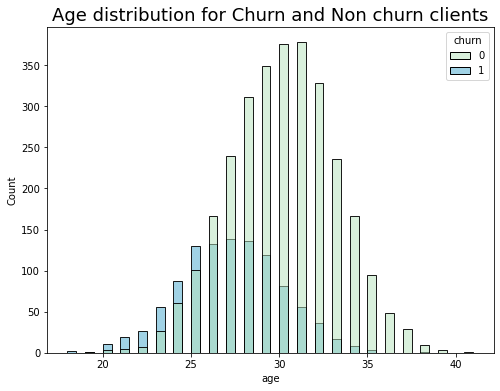

In [8]:
plt.figure(figsize=(8, 6))
plt.title('Age distribution for Churn and Non churn clients', fontsize=18)
sns.histplot(gym, x='age', hue='churn',palette='GnBu');

Let's turn to the histplots that show us the distribution of different features in terms of churn and non churn groups,we see that at the age of 25-30 the number of churned visitors is less.

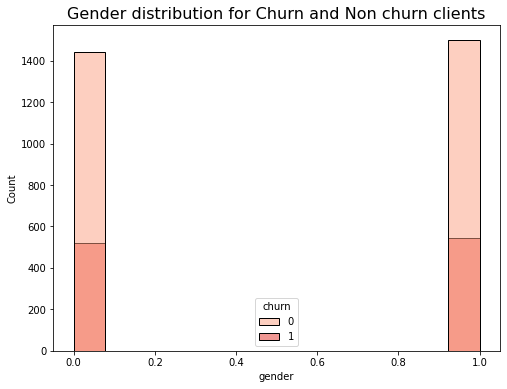

In [9]:
plt.figure(figsize=(8, 6))
plt.title('Gender distribution for Churn and Non churn clients', fontsize=16)
sns.histplot(gym, x='gender', hue='churn',palette='Reds');

The histogram shows us that the groups are equal and they have the same amount of churn(app. 500) and non churn clients(900)

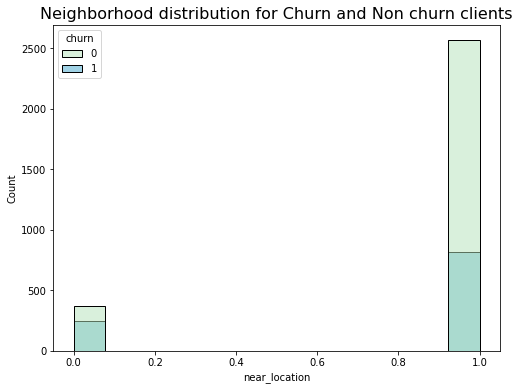

In [10]:
plt.figure(figsize=(8, 6))
plt.title('Neighborhood distribution for Churn and Non churn clients', fontsize=16)
sns.histplot(gym, x='near_location', hue='churn',palette='GnBu');

There is remarkable difference between these 2 groups. There is a bigger group of people who a non churn that lives nearby the gym. But also we see that we don't really have a lot of clients that live far. 

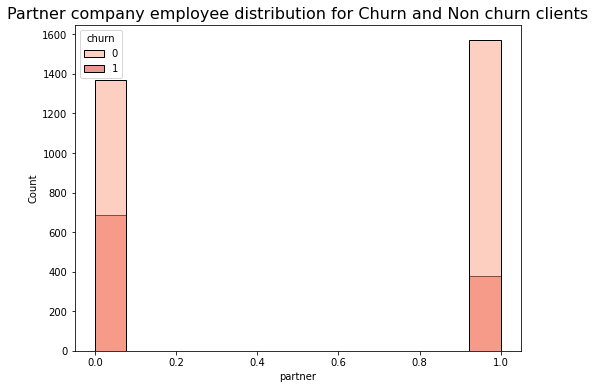

In [11]:
plt.figure(figsize=(8, 6))
plt.title('Partner company employee distribution for Churn and Non churn clients', fontsize=16)
sns.histplot(gym, x='partner', hue='churn',palette='Reds');

There are more churn clients that aren't connected to partner company. Yhe amount of churn within the partner company members is much less than than non churn.

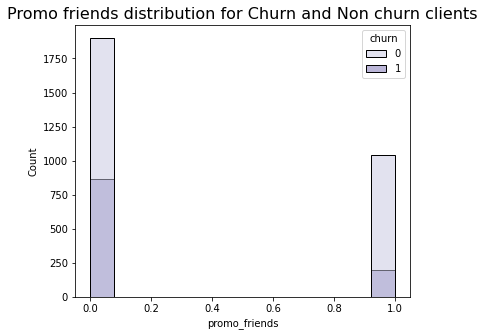

In [12]:
plt.figure(figsize=(6, 5))
plt.title('Promo friends distribution for Churn and Non churn clients', fontsize=16)
sns.histplot(gym, x='promo_friends', hue='churn',palette='Purples');

Remarkable that the number of promo friends group is much higher than the other one. But the ones who actually came with the promo friends action are more loyal and has a really small quantity of churn clients.

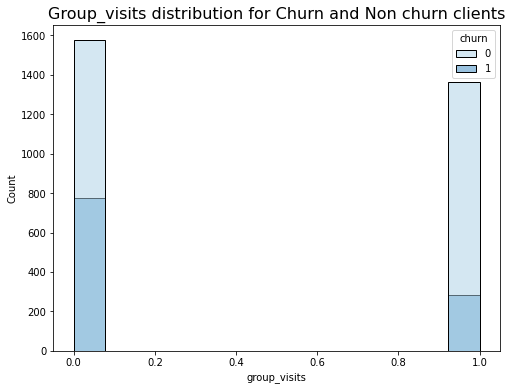

In [13]:
plt.figure(figsize=(8, 6))
plt.title('Group_visits distribution for Churn and Non churn clients', fontsize=16)
sns.histplot(gym, x='group_visits', hue='churn',palette='Blues');

The graph above showes us that the groups that don't attend group visits classes and that do are almost the same, but among the clients who have group visits the churn % is less.

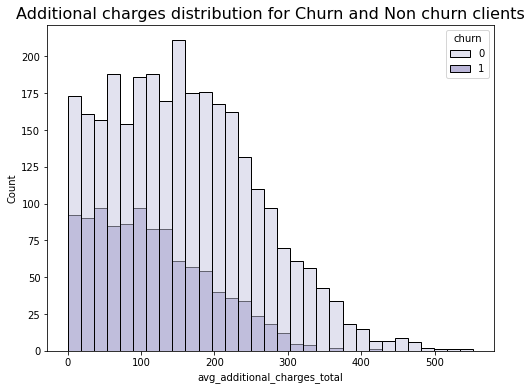

In [14]:
plt.figure(figsize=(8, 6))
plt.title('Additional charges distribution for Churn and Non churn clients', fontsize=16)
sns.histplot(gym, x='avg_additional_charges_total', hue='churn',palette='Purples');

This graph points us that the distibution is the same. However the non churn clients here spend more on the additional charges than the churn group.

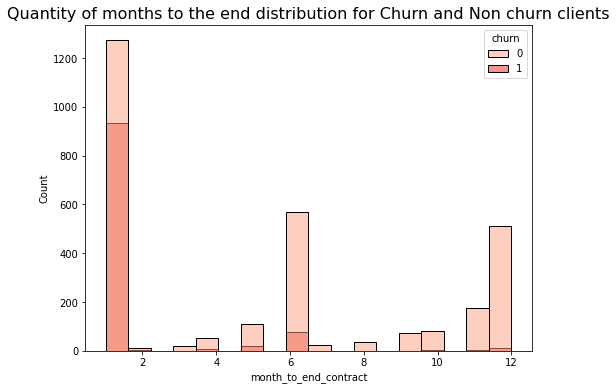

In [15]:
plt.figure(figsize=(8, 6))
plt.title('Quantity of months to the end distribution for Churn and Non churn clients', fontsize=16)
sns.histplot(gym, x='month_to_end_contract', hue='churn',palette='Reds');

Most of users have 1 month to the end of the contract, then we have 6 months and 12 month. We see that the less months we have the more churn clients we see here.

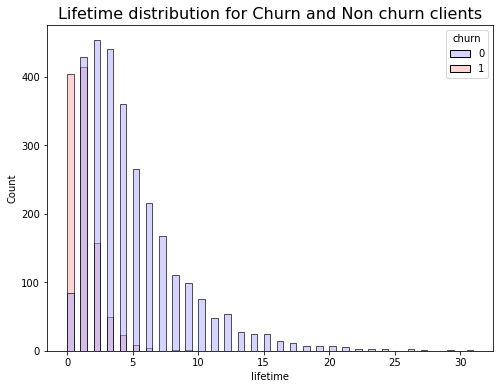

In [16]:
plt.figure(figsize=(8, 6))
plt.title('Lifetime distribution for Churn and Non churn clients', fontsize=16)
sns.histplot(gym, x='lifetime', hue='churn',palette='bwr');

The maximum lifetime is concentrated between 3 and 5 months. It is logical that the less lifetime the most churn customers we see here. 

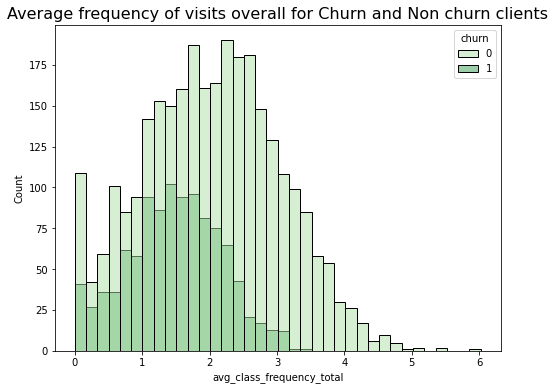

In [17]:
plt.figure(figsize=(8, 6))
plt.title('Average frequency of visits overall for Churn and Non churn clients', fontsize=16)
sns.histplot(gym, x='avg_class_frequency_total', hue='churn',palette='Greens');

The distribution is looking equally and has the same peaks and falls for churn and non churn, the non churn visitors on average visit more often than the churn clients.

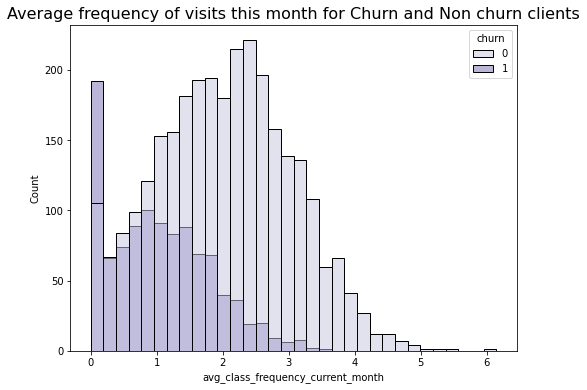

In [18]:
plt.figure(figsize=(8, 6))
plt.title('Average frequency of visits this month for Churn and Non churn clients', fontsize=16)
sns.histplot(gym, x='avg_class_frequency_current_month', hue='churn',palette='Purples');

As for the current month we see that the churn clients are screwed to the left, we see that the 200 visitors didn't attend the class this months and they churned. 

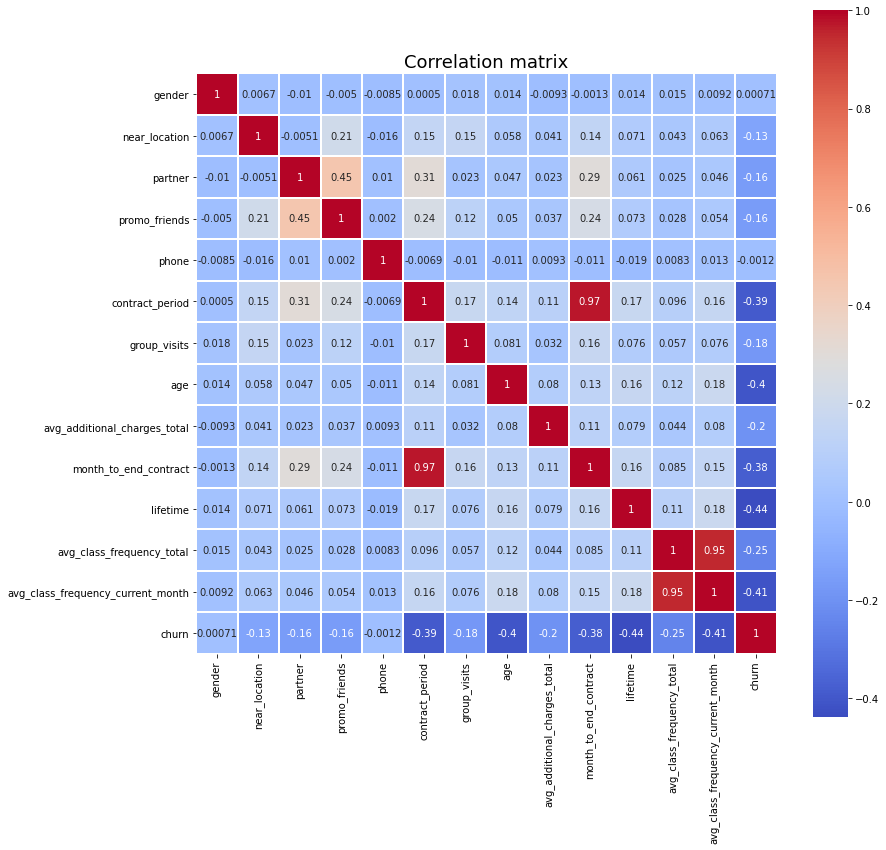

In [19]:
corr_m = gym.corr() 
plt.figure(figsize=(13, 13))
plt.title('Correlation matrix', fontsize=18)
sns.heatmap(corr_m,square = True, annot = True,cmap="coolwarm",linewidth=1, linecolor='w');

Analysing the heatmap we can indicate that the phone and the gender have no impact on the churn rate, as for location, partner and promo friends they do have the positive correlation with the churn and the average class frequency, age and the contract period has the negative correlation. As it was mentioned the phone and gender don't impact the churn, so we can reove these columns from the data for further analysis.

In [20]:
gym.drop(gym.columns[[0, 4]], axis = 1, inplace = True)
gym.head()

,near_location,partner,promo_friends,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
0,1,1,1,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,1,0,0,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,1,1,0,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


### Step . Building a model to predict user churn. Here we are going to use the train_test_split() function to divide the data into train and "test" (validation) sets with a ratio of 80 to 20.

In [21]:
gym = pd.get_dummies(gym)
X = gym.drop('churn', axis = 1)
y = gym['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Now we are going to train StandardScaler() and apply it to the train matrix of features using the fit_transform() method. After that we should train 2 models on the train set with two methods:

- random forest
- logistic regression

In [22]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test)
rf_model = RandomForestClassifier(n_estimators = 100, random_state = 0)
rf_model.fit(X_train_st, y_train)
rf_predictions = rf_model.predict(X_test_st) 
rf_probabilities = rf_model.predict_proba(X_test_st)[:,1]

print('Accuracy: {:.2f}'.format(accuracy_score(y_test, rf_predictions)))
print('Precision: {:.2f}'.format ( precision_score (y_test, rf_predictions)))
print('Recall: {:.2f}'.format(recall_score(y_test, rf_predictions)))


Accuracy: 0.94
Precision: 0.89
Recall: 0.85


In [23]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test)
model = LogisticRegression(random_state = 0)

model.fit(X_train, y_train)

probabilities = model.predict_proba(X_test)[:,1]


predictions = model.predict(X_test)


print('Accuracy: {:.2f}'.format(accuracy_score(y_test, predictions)))
print('Precision: {:.2f}'.format ( precision_score (y_test, predictions)))
print('Recall: {:.2f}'.format(recall_score(y_test, predictions)))

Accuracy: 0.92
Precision: 0.89
Recall: 0.81


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


As we trained 2 models: we have got the following the results, the accuracy and the precision is the same for both models, the values are very high and are near (1), that means the models are good , the recall is higher (0,86 vs 0.84)in the Random Forest model, that means we can choose this model as the best one.

### Step 4. User clusters

In [24]:
from sklearn.cluster import KMeans

In [25]:
sc = StandardScaler()
x_sc = sc.fit_transform(gym)
linked = linkage(x_sc, method = 'ward') 
km = KMeans(n_clusters = 5) 
labels = km.fit_predict(x_sc) 
gym['cluster_km'] = labels

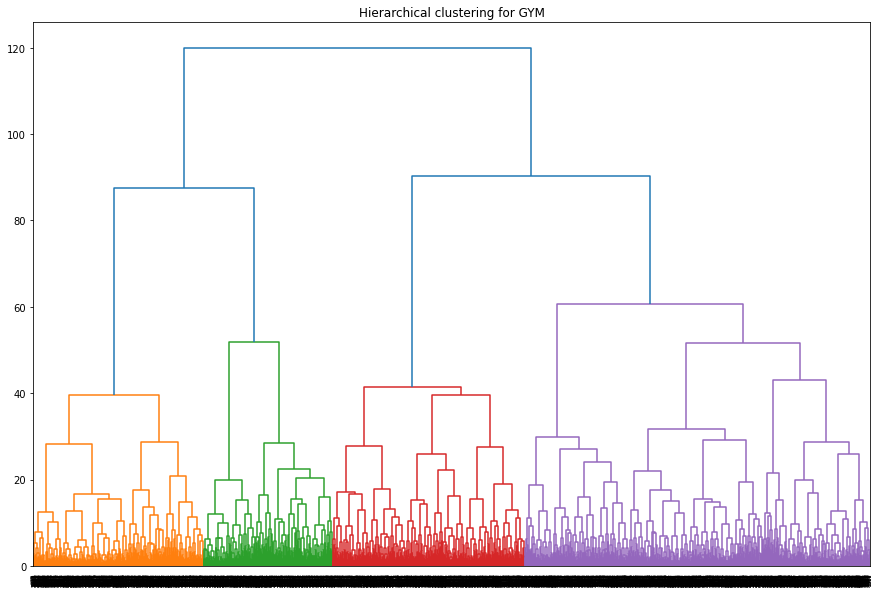

In [26]:
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Hierarchical clustering for GYM')
plt.show() 

Now we have a dendrogramm with 4 hierarchical clusters colored in different colors.

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


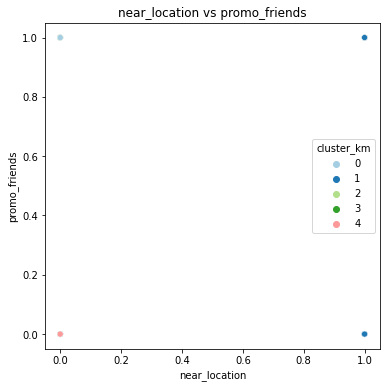

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


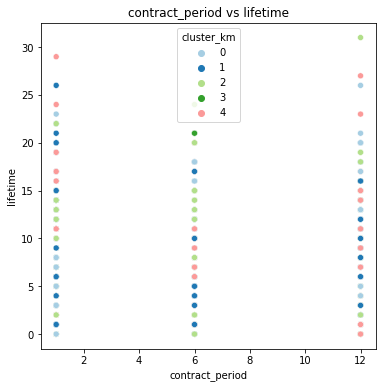

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


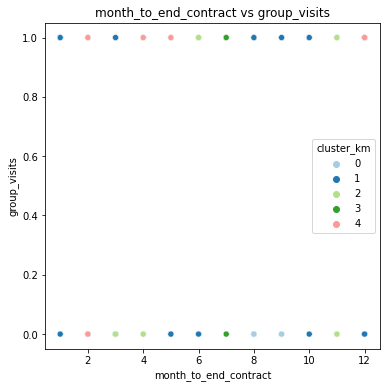

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


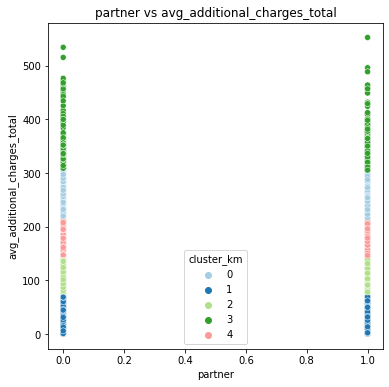

In [27]:
def show_clusters_on_plot(df, x_name,y_name, cluster_name):
    plt.figure(figsize = (6,6))
    sns.scatterplot(df[x_name], df[y_name],
          hue = df[cluster_name], palette = 'Paired'
       )
    plt.title('{} vs {}'.format(x_name, y_name))
    plt.show()


sc = StandardScaler()
x_sc = sc.fit_transform(gym.drop(columns = ['churn']))


km = KMeans(n_clusters = 5) 
labels = km.fit_predict(gym.drop(columns=['churn'])) 
gym['cluster_km']=labels

mean_feat= gym.groupby(['cluster_km']).mean()

show_clusters_on_plot(gym, 'near_location','promo_friends', 'cluster_km')
show_clusters_on_plot(gym, 'contract_period','lifetime', 'cluster_km')
show_clusters_on_plot(gym, 'month_to_end_contract','group_visits', 'cluster_km')
show_clusters_on_plot(gym, 'partner','avg_additional_charges_total', 'cluster_km')

The mean features show us that the average age is 29, there is no big difference between lifetime=from 3,7 to 4,40, the members of partners company are from 0.49 to 0.51, the average additinal charges are really different, the average contract period is from 4,1 to 5,7 months.

In [28]:
mean_feat

,near_location,partner,promo_friends,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
cluster_km,,,,,,,,,,,,
0,0.881020,0.511331,0.347025,5.400850,0.433428,29.344193,250.984767,5.001416,4.169972,1.903480,1.843255,0.178470
1,0.824782,0.488867,0.293320,4.206196,0.387222,28.906099,35.634787,3.861568,3.392062,1.837965,1.693978,0.349468
2,0.839494,0.451362,0.280156,4.293774,0.407588,28.976654,105.966990,3.990272,3.546693,1.851364,1.706935,0.334630
3,0.856089,0.516605,0.332103,5.822878,0.431734,29.845018,356.481960,5.383764,4.420664,2.019260,2.009382,0.044280
4,0.844075,0.495842,0.320166,4.755717,0.423077,29.401247,174.873445,4.376299,3.749480,1.895200,1.785569,0.226611


The churn rate for each cluster.
The average churn rate for different clusters is shown below, this table point us that the most loyal cluster is number 3 (it has the most goup visits, it has 5 months on average to the end of the contract, the avg frequency is the highest here too, the have the most number of group visits and they belong to the partner companies. The second loyal is the first cluster , they have the most promo friends average feature, as the one that is prone to leaving is the second group, the average client here lives not near to the gym, they have less members of partners companies, they don't attend group visits, the additional charges are just 34 and they have the worst average class frequency in total and in this particular month.

In [29]:
mean_churn = gym.groupby(['cluster_km'])['churn'].mean()
mean_churn.head()

cluster_km
0    0.178470
1    0.349468
2    0.334630
3    0.044280
4    0.226611
Name: churn, dtype: float64

Conclusions:
We made an analysis of The gym chain "Model Fitness". The analisys was made with the base of 4000 rows. It didn't have missing values. The aim was to find out the connection between churn and non churn and the other features. The heatmap showed us that the connection between churn and gender and the phone was the minimum, so these 2 columns were deleted not to use in the future analysis. 
The next step was the testing of 2 models and the random forrest showed the better results as a model. 
We made 4 clusters in the database and this devision showed us the portrait of the most loyal group of customers. It turned out that the cluster 3 is the best one and we should focuse on the customers that have the similar characteristics. The most likely client for us leaves nearby, the age is 29-35 years. We should also focuse on the actions for partner companies, we see that the connection to the company increases loyalty, maybe they go to the gym together with the colleagues. We also see the impact of the action to bring a friend, but the impact is not that significant, but we also can use that action to bring more loyal customers.